# <h> Exploratory Data Analysis for Electric Vehicle Range, Efficiency, and Price </h>

This project utilizes a data set on brand, range, efficiency, body style, and price for 103 electric vehicles from 33 top car brands. 

## <b> 1. Import and Clean Data

In this section, the Python libraries and data set are imported into Jupyter Notebook. The data are checked for duplicates, missing values, and any other potential issues.

### 1a. Import Libraries and Data

In [162]:
# Import Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [102]:
# Read in dataset
ev = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/ElectricCarData_Clean.csv')

In [103]:
# Print dataset info
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [104]:
# Print the first 10 rows of the dataset
ev.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


### 1b. Rename Columns and Change Data Types

In [105]:
# Rename columns with snake case

ev = ev.rename(
    columns={'Brand':'brand',
             'Model':'model',
             'AccelSec':'accel_sec',
             'TopSpeed_KmH':'top_speed_kmh',
             'Range_Km':'range_km',
             'Efficiency_WhKm':'efficiency_whkm',
             'FastCharge_KmH':'fast_charge_kmh',
             'RapidCharge':'rapid_charge',
             'PowerTrain':'power_train',
             'PlugType':'plug_type',
             'BodyStyle':'body_style',
             'Segment':'segment',
             'Seats':'seats',
             'PriceEuro':'price_euro'
             }
)

In [106]:
# Check columns are now all snake case
print(ev.columns)

Index(['brand', 'model', 'accel_sec', 'top_speed_kmh', 'range_km',
       'efficiency_whkm', 'fast_charge_kmh', 'rapid_charge', 'power_train',
       'plug_type', 'body_style', 'segment', 'seats', 'price_euro'],
      dtype='object')


In [107]:
# Change fast_charge_kmh data type from object to int

# First check the unique values of fast_charge_kmh
print(ev['fast_charge_kmh'].unique())

['940' '250' '620' '560' '190' '220' '420' '650' '540' '440' '230' '380'
 '210' '590' '780' '170' '260' '930' '850' '910' '490' '470' '270' '450'
 '350' '710' '240' '390' '570' '610' '340' '730' '920' '-' '550' '900'
 '520' '430' '890' '410' '770' '460' '360' '810' '480' '290' '330' '740'
 '510' '320' '500']


In [108]:
# Change '-' to NaN
ev['fast_charge_kmh'] = ev['fast_charge_kmh'].replace('-', np.NaN)

print(ev['fast_charge_kmh'].unique())

['940' '250' '620' '560' '190' '220' '420' '650' '540' '440' '230' '380'
 '210' '590' '780' '170' '260' '930' '850' '910' '490' '470' '270' '450'
 '350' '710' '240' '390' '570' '610' '340' '730' '920' nan '550' '900'
 '520' '430' '890' '410' '770' '460' '360' '810' '480' '290' '330' '740'
 '510' '320' '500']


In [109]:
# Change fast_charge_kmh to int type data
ev['fast_charge_kmh'] = pd.to_numeric(ev['fast_charge_kmh'])

ev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            103 non-null    object 
 1   model            103 non-null    object 
 2   accel_sec        103 non-null    float64
 3   top_speed_kmh    103 non-null    int64  
 4   range_km         103 non-null    int64  
 5   efficiency_whkm  103 non-null    int64  
 6   fast_charge_kmh  98 non-null     float64
 7   rapid_charge     103 non-null    object 
 8   power_train      103 non-null    object 
 9   plug_type        103 non-null    object 
 10  body_style       103 non-null    object 
 11  segment          103 non-null    object 
 12  seats            103 non-null    int64  
 13  price_euro       103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


### 1c. Check for Missing Data and Duplicates

In [110]:
# Check for missing values
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            103 non-null    object 
 1   model            103 non-null    object 
 2   accel_sec        103 non-null    float64
 3   top_speed_kmh    103 non-null    int64  
 4   range_km         103 non-null    int64  
 5   efficiency_whkm  103 non-null    int64  
 6   fast_charge_kmh  98 non-null     float64
 7   rapid_charge     103 non-null    object 
 8   power_train      103 non-null    object 
 9   plug_type        103 non-null    object 
 10  body_style       103 non-null    object 
 11  segment          103 non-null    object 
 12  seats            103 non-null    int64  
 13  price_euro       103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


The missing values are all in the fast_charge_kmh variable. These represent cars that don't have measurements for this value. Because there are only 5 missing values, we will keep the missing data and exclude these cars from analyses that use this variable. 

In [111]:
# Check for fully duplicate rows
ev_duplicates = ev.duplicated().sum()

print(f'The number of fully duplicated rows is: {ev_duplicates}')

The number of fully duplicated rows is: 0


In [112]:
# Check for implicit brand-model duplicates
ev_brand_model_duplicates = ev[['brand', 'model']].duplicated().sum()

print(f'The number of brand-model duplicates is: {ev_brand_model_duplicates}')

The number of brand-model duplicates is: 1


In [113]:
# Find the duplicate brand-model rows
ev_brand_model_duplicate_row = ev[ev[['brand', 'model']].duplicated()==True]

display(ev_brand_model_duplicate_row)

display(ev[(ev['brand']=='Kia ') & (ev['model']=='e-Soul 64 kWh')])

,brand,model,accel_sec,top_speed_kmh,range_km,efficiency_whkm,fast_charge_kmh,rapid_charge,power_train,plug_type,body_style,segment,seats,price_euro
92,Kia,e-Soul 64 kWh,7.9,167,365,175,320.0,Yes,FWD,Type 2 CCS,SUV,B,5,36837


,brand,model,accel_sec,top_speed_kmh,range_km,efficiency_whkm,fast_charge_kmh,rapid_charge,power_train,plug_type,body_style,segment,seats,price_euro
45,Kia,e-Soul 64 kWh,7.9,167,365,175,340.0,Yes,FWD,Type 2 CCS,SUV,B,5,36837
92,Kia,e-Soul 64 kWh,7.9,167,365,175,320.0,Yes,FWD,Type 2 CCS,SUV,B,5,36837


The Kia e-Soul 64 kWh row is fully duplicated except for the fast_charge_kmh column. I believe this was a data entry error, that there is in reality only one make and model of this car and one of the fast_charge_kmh was mis-entered. I will delete the duplicate row. 

In [119]:
ev = ev.drop_duplicates(subset=['brand', 'model']).reset_index(drop=True) # Delete duplicate rows

new_ev_brand_model_duplicates = ev[['brand', 'model']].duplicated().sum() # Check again for duplicates

print(f'The number of duplicates in the ev dataset is now: {new_ev_brand_model_duplicates}')

The number of duplicates in the ev dataset is now: 0


## 2. Exploratory Data Analysis

An exploratory analysis of the range, efficiency, charging speed, and price of electric vehicles for the top brands of car makers. There is additional analysis of these features by body style and power_train. 

### 2a. Create a top_brands data frame and run descriptive analysis of price, efficiency, and range by brand

To narrow down the number of brands for the analysis, I define top_brand as brands that have 5 or more electric vehicles on the market.

In [115]:
n_brand_unique = len(ev['brand'].unique()) # Count unique brands represented in the dataset

print(f'There are {n_brand_unique} unique car brands. They are:')
print()
print(ev['brand'].unique()) # Display unique brand names

There are 33 unique car brands. They are:

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']


In [116]:
ev['brand'].value_counts() # Count the number of vehiclese for each brand in the dataset

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
BMW             4
Ford            4
Kia             4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: brand, dtype: int64

In [193]:
# Create data from with only brands that have 3 or more evs on the market
top_brands = ev[(ev['brand']=='Tesla ') | (ev['brand']=='Audi ') | (ev['brand']=='Nissan ') 
                | (ev['brand']=='Volkswagen ') | (ev['brand']=='Skoda ') | (ev['brand']=='Renault ') 
                | (ev['brand']=='Porsche ') | (ev['brand']=='BMW ') | (ev['brand']=='Ford ')
                | (ev['brand']=='Kia ') | (ev['brand']=='Smart ') | (ev['brand']=='Byton ')
                | (ev['brand']=='Mercedes ') | (ev['brand']=='Hyundai ') | (ev['brand']=='Opel ')] 

In [194]:
# Create a pivot table with min, max, mean, median, and standard deviation for each brand's
# efficiency, price, and range.
top_brands_pivot = top_brands.pivot_table(index='brand', values=['range_km', 'efficiency_whkm', 'price_euro'], 
                                          aggfunc=['min', 'max', 'mean', 'median', 'std'])

display(top_brands_pivot)

min                                 max             \
            efficiency_whkm price_euro range_km efficiency_whkm price_euro   
brand                                                                        
Audi                    188      55000      280             270     125000   
BMW                     161      38017      230             206      68040   
Byton                   222      53500      325             244      64000   
Ford                    194      46900      340             209      62900   
Hyundai                 153      33971      250             160      40795   
Kia                     167      33133      230             175      38105   
Mercedes                171      45000      330             273      70631   
Nissan                  164      29234      190             232      65000   
Opel                    164      29146      255             176      41906   
Porsche                 195     102945      365             223     180781   
Renault                 161      24790      130             194      38000   
Skoda                   166      24534      195             193      47500   
Smart                   167      21387       95             176      24565   
Tesla                   153      45000      310             267     215000   
Volkswagen              166      21421      190             183      45000   

                                mean                             \
            range_km efficiency_whkm     price_euro    range_km   
brand                                                             
Audi             425      224.555556   80593.666667  356.666667   
BMW              450      177.500000   53145.750000  318.750000   
Byton            400      234.666667   59833.333333  371.666667   
Ford             450      202.250000   54568.750000  395.000000   
Hyundai          400      155.666667   36408.333333  301.666667   
Kia              370      171.250000   35618.750000  300.000000   
Mercedes         370      220.000000   61705.000000  350.000000   
Nissan           440      194.750000   45902.125000  328.125000   
Opel             335      171.000000   35350.666667  288.333333   
Porsche          425      209.400000  138265.800000  388.000000   
Renault          315      170.400000   31268.200000  234.000000   
Skoda            420      182.500000   38255.666667  337.500000   
Smart            100      173.000000   22660.666667   96.666667   
Tesla            970      201.384615   80272.307692  500.769231   
Volkswagen       440      170.875000   34602.375000  318.125000   

                     median                                 std                \
            efficiency_whkm price_euro range_km efficiency_whkm    price_euro   
brand                                                                           
Audi                  228.0    79445.0    365.0       28.535553  22003.172072   
BMW                   171.5    53263.0    297.5       20.338797  15559.130147   
Byton                 238.0    62000.0    390.0       11.372481   5575.242895   
Ford                  203.0    54237.5    395.0        6.652067   6546.034900   
Hyundai               154.0    34459.0    255.0        3.785939   3806.792526   
Kia                   171.5    35618.5    300.0        3.500000   2260.521824   
Mercedes              216.0    69484.0    350.0       51.117512  14478.317271   
Nissan                196.0    47500.0    327.5       20.885744  12228.344152   
Opel                  173.0    35000.0    275.0        6.244998   6387.223601   
Porsche               215.0   148301.0    385.0       12.601587  32141.871223   
Renault               165.0    31184.0    255.0       13.427584   4871.004640   
Skoda                 182.0    38750.0    360.0       10.074721   8166.283896   
Smart                 176.0    22030.0     95.0        5.196152   1680.245915   
Tesla                 188.0    65620.0    450.0       39.075863  44432.092785   
Volkswagen            169.5    3428

In [202]:
price_hist = px.histogram(top_brands, x='brand', y='price_euro', histfunc='avg', 
                          title='Average Price by Brand of EVs',
                          labels={'price_euro':'Price (Euros)', 'brand':'Brand Name'})

price_hist.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

price_hist.update_layout(xaxis={'categoryorder':'total descending'})

price_hist.update_xaxes(showgrid=False)
price_hist.update_yaxes(showgrid=False)

price_hist.show()

In [208]:
eff_hist = px.histogram(top_brands, x='brand', y='efficiency_whkm', histfunc='avg', 
                          title='Average Efficiency by Brand of EVs',
                          labels={'efficiency_whkm':'Efficiency (WhKm)', 'brand':'Brand Name'})

eff_hist.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

eff_hist.update_layout(xaxis={'categoryorder':'array', 'categoryarray':
    ['Porsche ', 'Audi ', 'Tesla ', 'Mercedes ', 'Byton ', 'Ford ', 'BMW ',
     'Nissan ', 'Skoda ', 'Hyundai ', 'Kia ', 'Opel ', 'Volkswagen ', 'Renault ', 'Smart ']})

eff_hist.update_xaxes(showgrid=False)
eff_hist.update_yaxes(showgrid=False)

eff_hist.show()

In [209]:
range_hist = px.histogram(top_brands, x='brand', y='range_km', histfunc='avg', 
                          title='Average Range by Brand of EVs',
                          labels={'range_km':'Range (Km)', 'brand':'Brand Name'})

range_hist.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

range_hist.update_layout(xaxis={'categoryorder':'array', 'categoryarray':
    ['Porsche ', 'Audi ', 'Tesla ', 'Mercedes ', 'Byton ', 'Ford ', 'BMW ',
     'Nissan ', 'Skoda ', 'Hyundai ', 'Kia ', 'Opel ', 'Volkswagen ', 'Renault ', 'Smart ']})

range_hist.update_xaxes(showgrid=False)
range_hist.update_yaxes(showgrid=False)

range_hist.show()

### 2b. Run exploratory analysis of efficiency, range, and price by body style

In [144]:
ev['body_style'].value_counts() # Find how many of each body style are in the data frame

SUV          44
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: body_style, dtype: int64

In [147]:
# Create data frame with only top 3 body styles for analysis
suv_hatch_sed = ev[(ev['body_style']=='SUV') | (ev['body_style']=='Hatchback') | (ev['body_style']=='Sedan')]

In [149]:
suv_hatch_sed_pivot = suv_hatch_sed.pivot_table(index='body_style', values=['range_km', 'efficiency_whkm', 'price_euro'], 
                                          aggfunc=['min', 'max', 'mean', 'median', 'std'])

display(suv_hatch_sed_pivot)

min                                 max             \
           efficiency_whkm price_euro range_km efficiency_whkm price_euro   
body_style                                                                  
Hatchback              156      20129       95             232      65000   
SUV                    154      30000      180             270     102990   
Sedan                  153      46380      310             223     180781   

                               mean                                    median  \
           range_km efficiency_whkm    price_euro    range_km efficiency_whkm   
body_style                                                                      
Hatchback       440      172.687500  34893.156250  268.593750           167.5   
SUV             450      198.090909  54372.204545  344.090909           193.0   
Sedan           610      186.600000  99966.900000  423.500000           187.5   

                                           std                           
           price_euro range_km efficiency_whkm    price_euro   range_km  
body_style                                                               
Hatchback     32998.5    262.5       15.883523  10516.855964  95.446610  
SUV           51750.0    362.5       26.733672  19073.516759  70.754018  
Sedan        103972.5    425.0       22.862876  43677.697125  78.953221

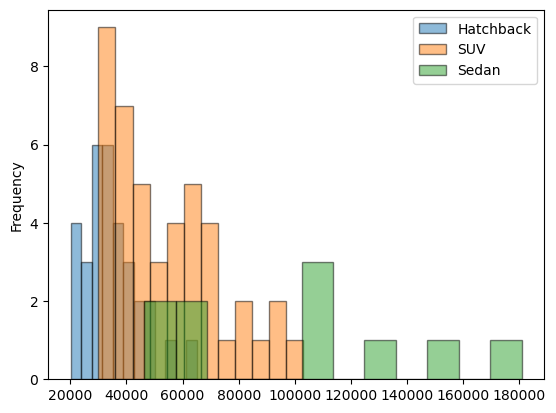

In [152]:
# Create a histogram of price by body style
suv_hatch_sed.groupby('body_style')['price_euro'].plot(kind='hist', alpha=0.5, bins=12, edgecolor='black')

plt.legend(['Hatchback', 'SUV', 'Sedan'])

plt.show()

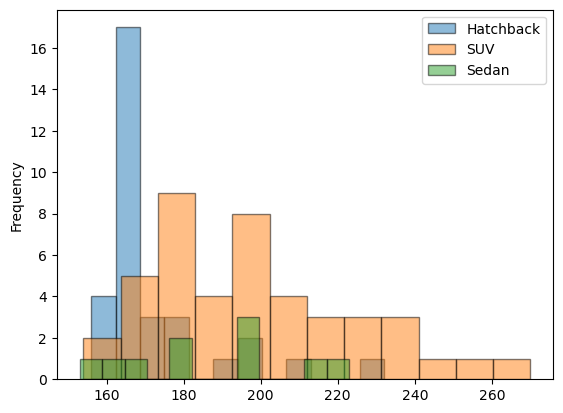

In [153]:
# Create a histogram of efficiency by body style
suv_hatch_sed.groupby('body_style')['efficiency_whkm'].plot(kind='hist', alpha=0.5, bins=12, edgecolor='black')

plt.legend(['Hatchback', 'SUV', 'Sedan'])

plt.show()

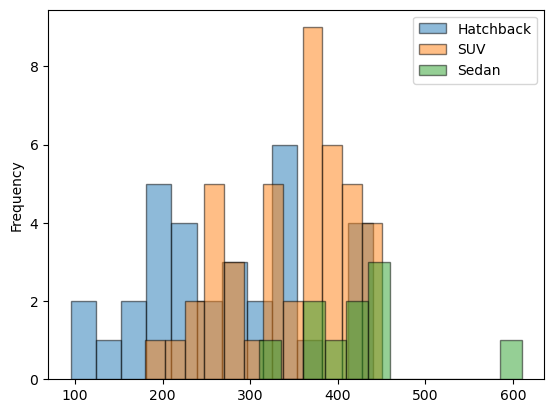

In [154]:
# Create a histogram of range by body style
suv_hatch_sed.groupby('body_style')['range_km'].plot(kind='hist', alpha=0.5, bins=12, edgecolor='black')

plt.legend(['Hatchback', 'SUV', 'Sedan'])

plt.show()

### 2c. Scatter plots of price by efficiency and range 

For this analysis, the full dataset is used to understand how price is related to efficiency and range in electric vehicles.

In [177]:
price_efficiency = px.scatter(data_frame=ev, title='Price vs Efficiency for EVs', x='efficiency_whkm', y='price_euro', 
           labels={'price_euro':'Price Euro', 'efficiency_whkm':'Efficiency WhKm'},
           color='brand')

price_efficiency.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

price_efficiency.update_xaxes(showgrid=False)
price_efficiency.update_yaxes(showgrid=False)

In [180]:
price_range = px.scatter(data_frame=ev, title='Price vs Range for EVs', x='range_km', y='price_euro', 
           labels={'price_euro':'Price Euro', 'range_km':'Range Km'},
           color='brand')

price_range.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

price_range.update_xaxes(showgrid=False)
price_range.update_yaxes(showgrid=False)
